## Waste Management using CNN Model

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# pip install tensorflow

In [7]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warningsdataset
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [8]:
train_path = 'dataset/DATASET/TRAIN'
test_path = 'dataset/DATASET/TEST'

In [11]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [15]:
# visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [03:51<00:00, 43.17it/s]


In [16]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x1ca67181370>,
 [Text(-1.131700766397965, -0.20433642684127334, 'organic'),
  Text(1.1317007485343022, 0.20433652577769967, 'recyclable')],
 [Text(-0.6396569549205888, -0.11549450212767623, '55.69%'),
  Text(0.6396569448237359, 0.11549455804826503, '44.31%')])

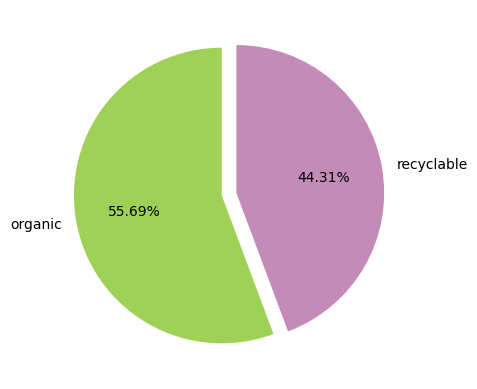

In [23]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['organic','recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])